In [1]:
library(Seurat)
library(SeuratData)
library(SeuratWrappers)
library(NICHES)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Installed datasets ─────────────────────────────────────────────────────────────────────────────────────────────────────────── SeuratData v0.2.2.9001 ──

✔ ifnb 3.1.0                                                                 


─────────────────────────────────────────────────────────────────────────── Key ───────────────────────────────────────────────────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width=14, repr.plot.height=10)
options(warn=-1)
set.seed(42)

In [3]:
combined_male <- readRDS("combined_male_8weeks.rds")
combined_male

An object of class Seurat 
20743 features across 15451 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [4]:
control_male <- subset(combined_male, subset = sample_type == "taPVAT_Control_8W_M")
control_male

An object of class Seurat 
20743 features across 5843 samples within 1 assay 
Active assay: RNA (20743 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

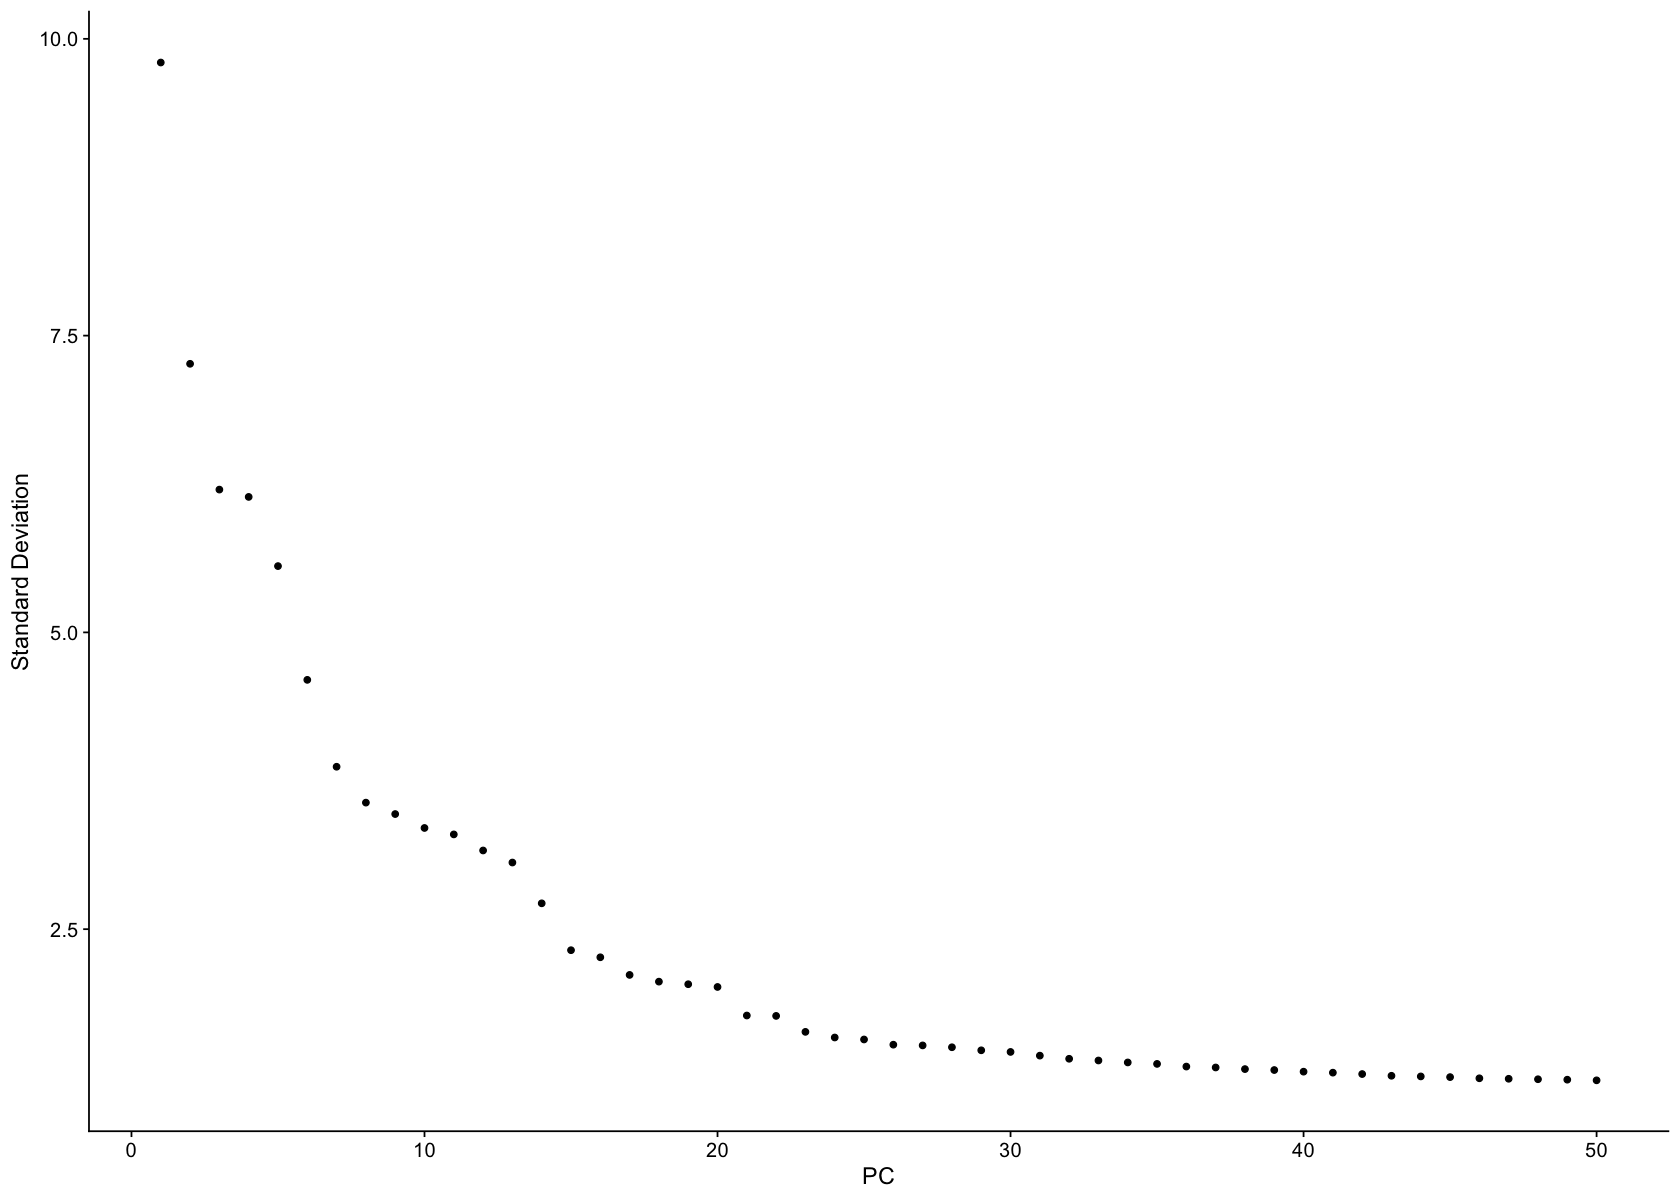

In [5]:
ElbowPlot(control_male,ndims=50)

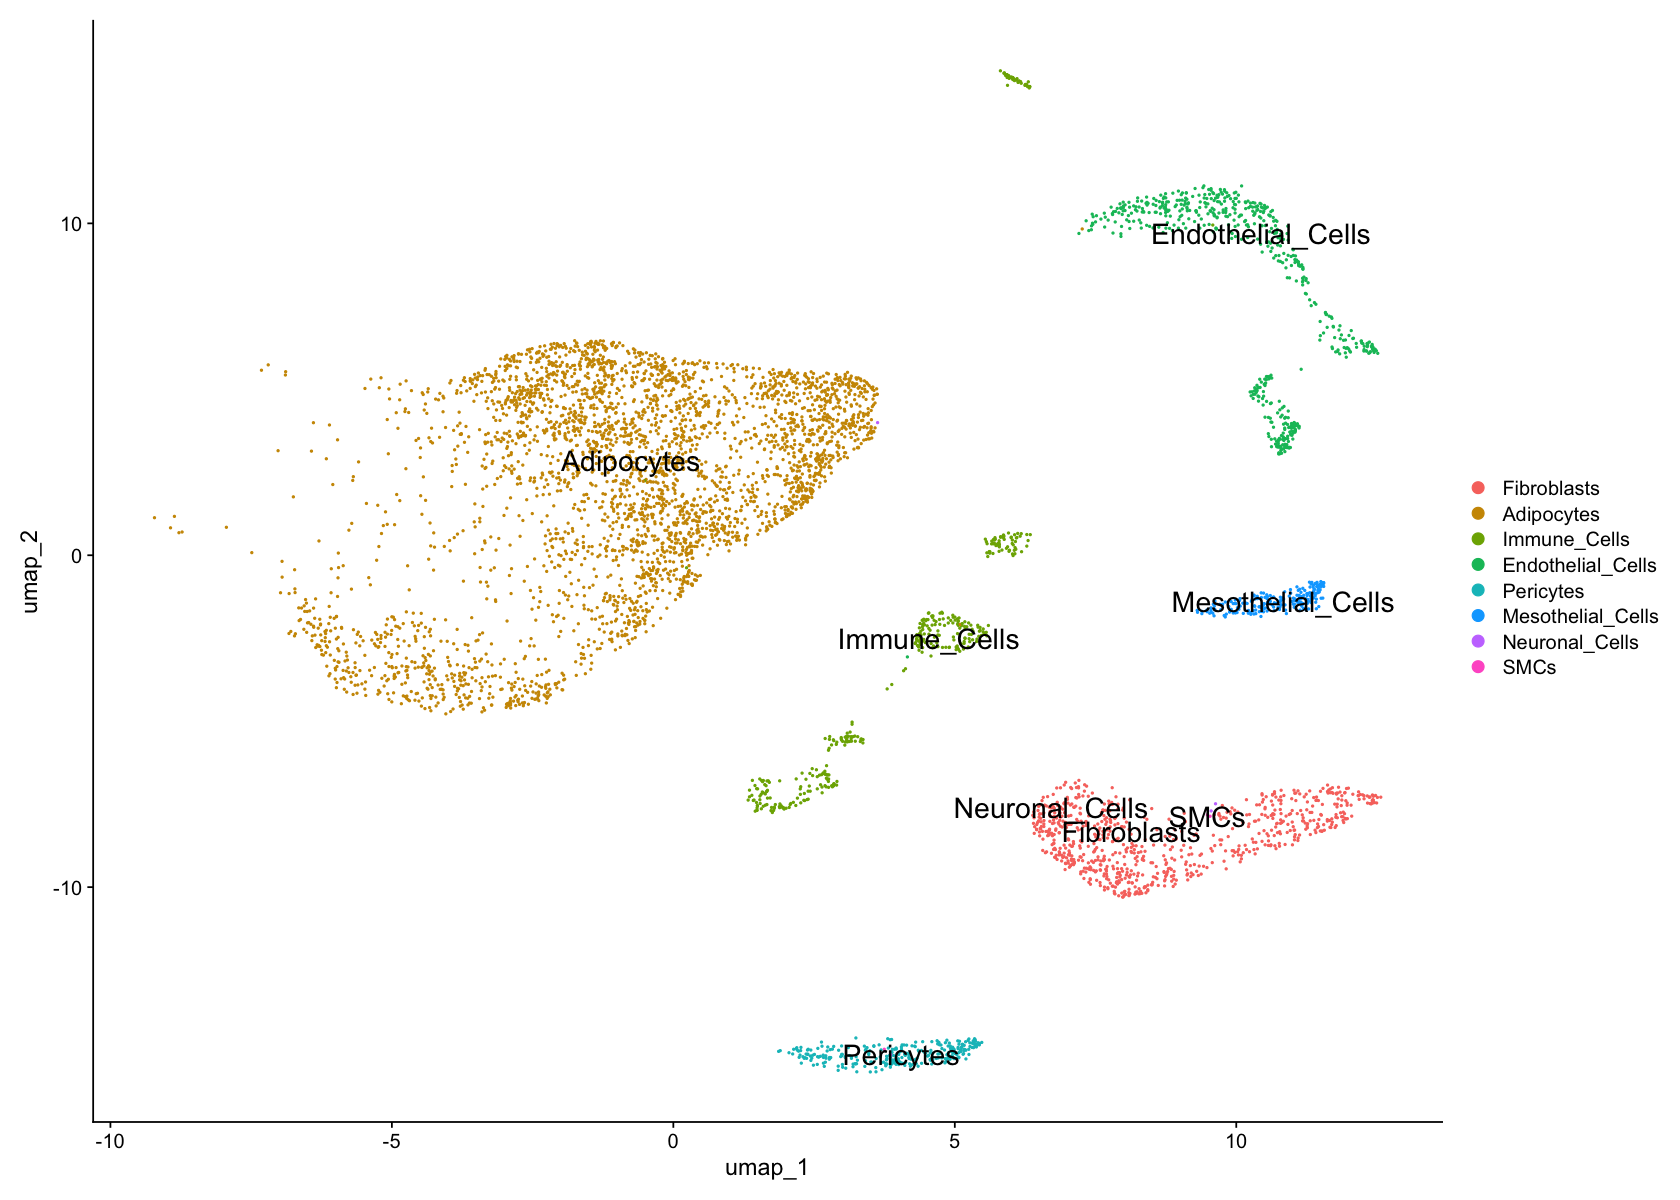

In [6]:
DimPlot(control_male,reduction = 'umap',label = T,repel = F,label.size = 6)

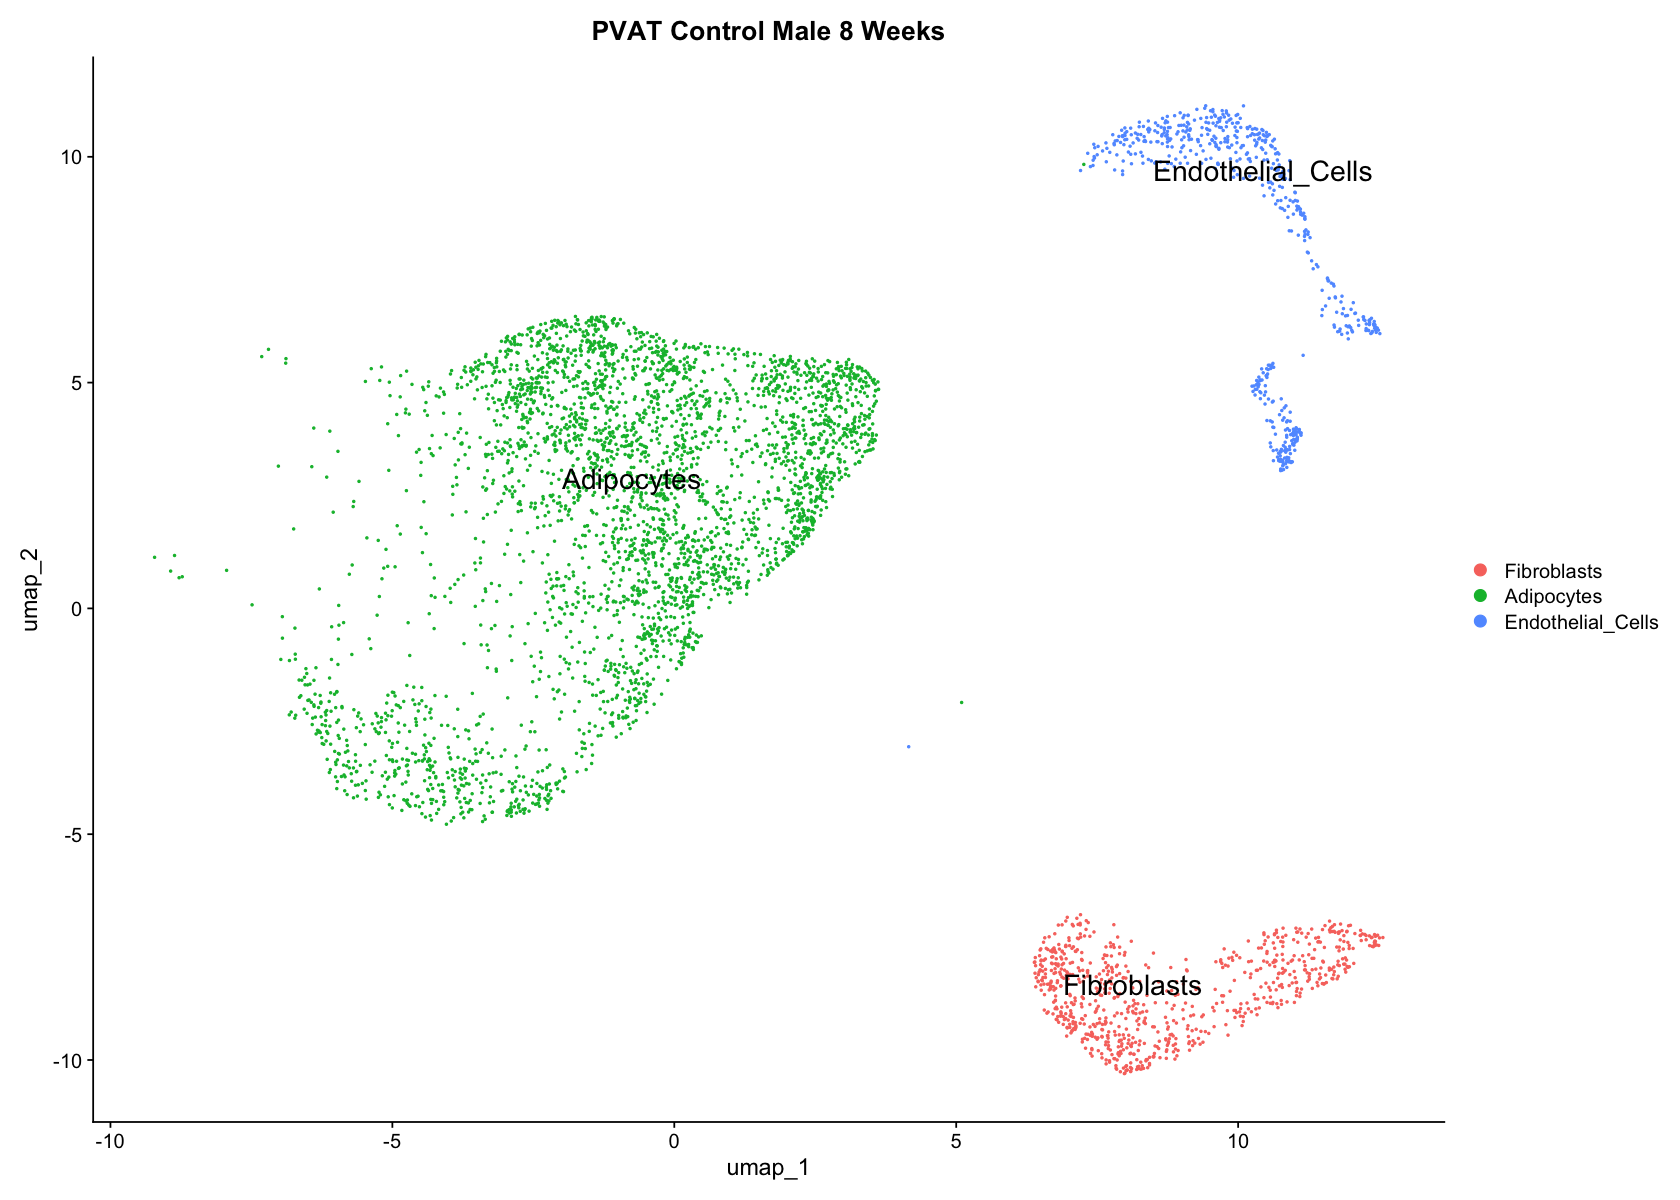

In [7]:
adipocytes_sub <- subset(control_male,idents = c('Adipocytes','Fibroblasts','Endothelial_Cells'))
DimPlot(adipocytes_sub,reduction = 'umap',label = T,repel = F,label.size = 6) + ggtitle("PVAT Control Male 8 Weeks") +
  theme(plot.title = element_text(hjust = 0.5))

In [8]:
scc <- RunNICHES(adipocytes_sub,
                 assay = 'RNA',
                 species = 'mouse',
                 LR.database = 'omnipath',
                 cell_types = 'celltype_broad',
                 CellToCell = T)

Set cell types as Identity of object internally


 4923 distinct cells from 3 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 3302 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 8851 Cell-To-Cell edges computed, sampling 9 distinct VectorTypes, out of 9 total possible



Centering and scaling data matrix

PC_ 1 
Positive:  Lama2—Itgb1, Col3a1—Itgb1, Col5a2—Itgb1, Col6a2—Itgb1, Col6a3—Itgb1, Col6a1—Itgb1, Fbn1—Itgb1, Col1a2—Itgb1, Col5a1—Itgb1, Adam12—Itgb1 
	   Lama2—Itga1, Col1a1—Itgb1, Col4a4—Itgb1, Col5a2—Itga1, Col6a2—Itga1, Col6a3—Itga1, Col6a1—Itga1, Col4a3—Itgb1, Col1a2—Itga1, Hspg2—Itgb1 
	   Col5a1—Itga1, Lamc1—Itgb1, Col1a1—Itga1, Col4a4—Itga1, Angpt1—Itgb1, Lama4—Itgb1, Col4a1—Itgb1, Nid1—Itgb1, Col4a3—Itga1, Lama2—Dag1 
Negative:  Vegfa—Nrp1, Sorbs1—Insr, Gnas—Adrb3, Adipoq—Adipor2, Sorbs1—Itga1, Klb—Fgfr1, Gnas—Gcgr, Nrg4—Erbb4, Psap—Lrp1, Sorbs1—Itgb5 
	   Tenm4—Adgrl3, Gnas—Tshr, Lpl—Lrp1, Vegfa—Nrp2, Nrg4—Egfr, Nampt—Insr, Gnas—Adcy9, Vegfa—Itgav, Vegfb—Nrp1, Col7a1—Itgb1 
	   Gpi—Amfr, Cntnap1—Rtn4, Flrt1—Adgrl3, Psap—Sort1, Adipoq—Adipor1, Gnas—Adora1, Ptprf—Insr, Calm1—Mylk, Uba52—Tgfbr2, Agrn—Ptprs 
PC_ 2 
Positive:  Lama4—Itga6, Lamc1—Itga6, Lama2—Itga6, Nrp1—Kdr, App—Plxna4, Sema6a—Plxna2, Timp3—Kdr, App—Cav1, Vegfa—Flt1, Efnb2—Pe

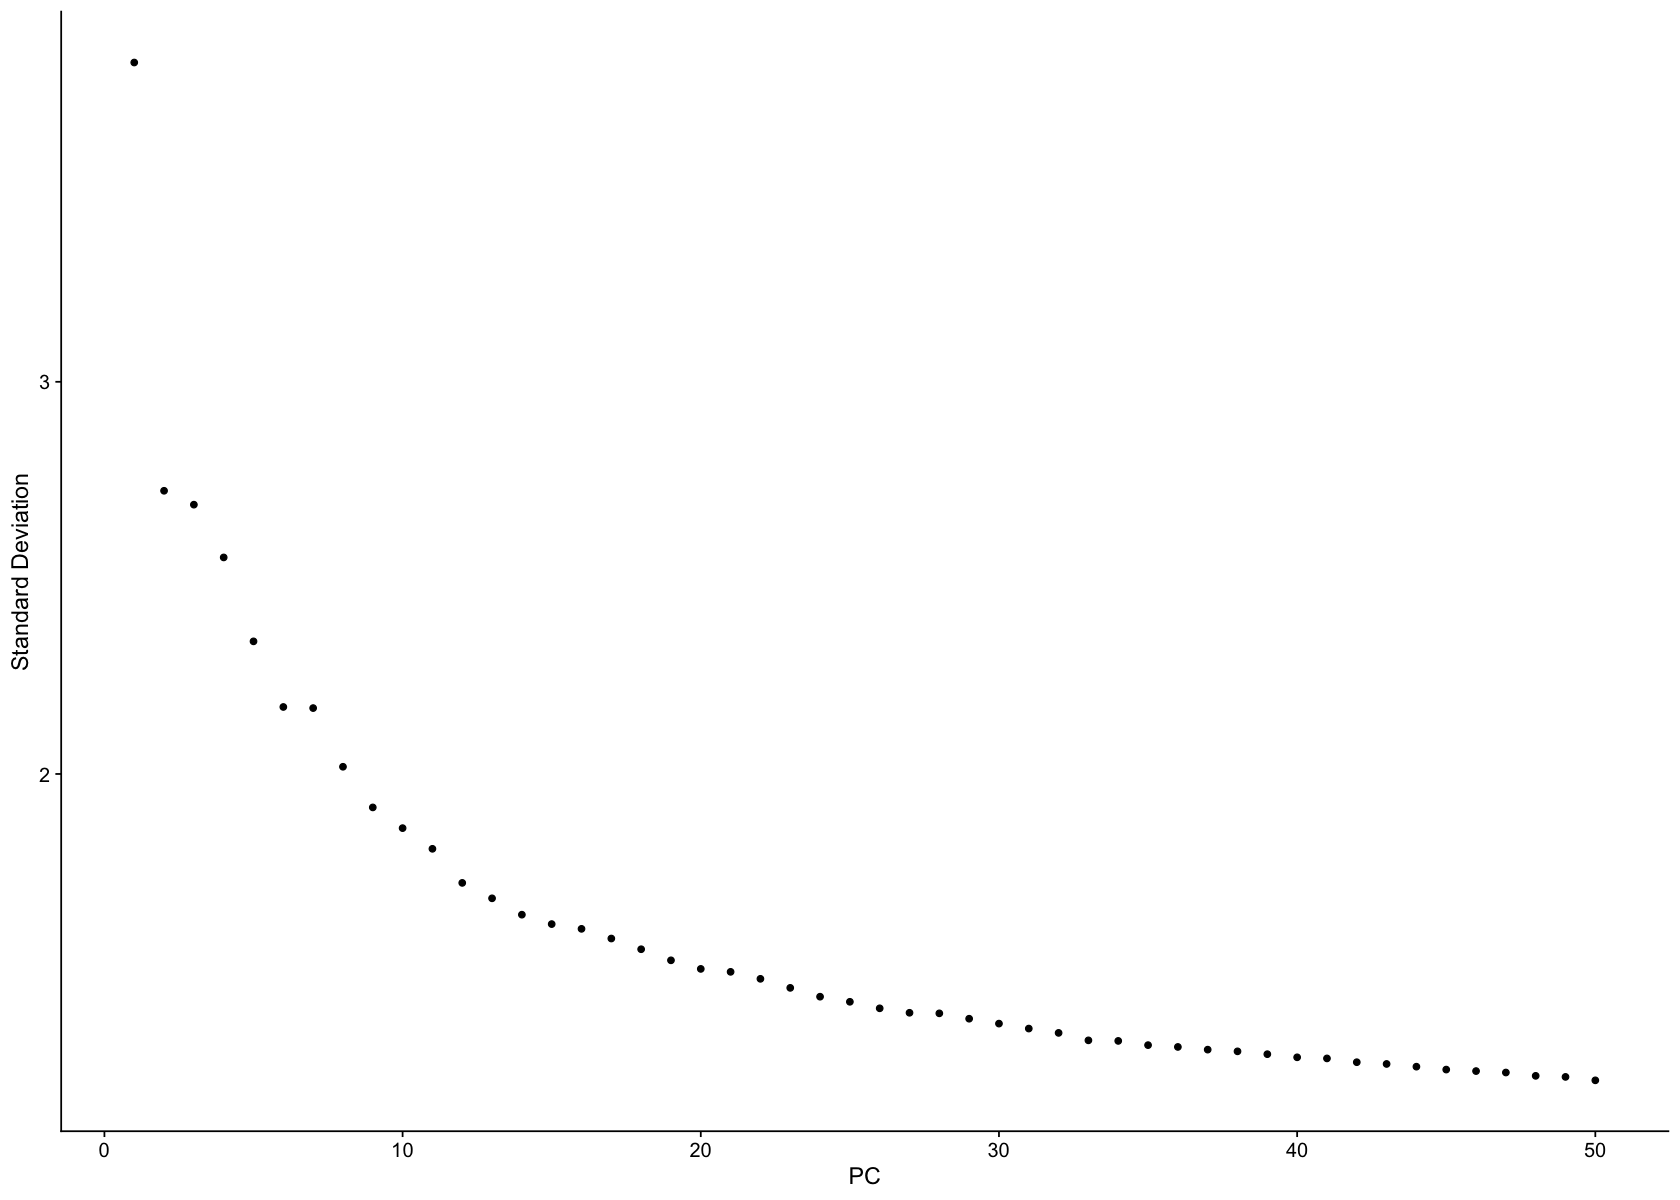

In [9]:
niches_obj <- scc$CellToCell
niches_obj <- ScaleData(niches_obj)
niches_obj <- RunPCA(niches_obj, features = rownames(niches_obj))
ElbowPlot(niches_obj, ndims=50)

In [10]:
head(niches_obj@meta.data)

,orig.ident,nCount_CellToCell,nFeature_CellToCell,SendingType,ReceivingType,VectorType,orig.ident.Sending,nCount_RNA.Sending,nFeature_RNA.Sending,sample_id.Sending,⋯,systolic_bp_7W.Joint,MAP_9W.Joint,systolic_bp_9W.Joint,MAP_16W.Joint,systolic_bp_16W.Joint,MAP_24W.Joint,systolic_bp_24W.Joint,doublet.Joint,celltype.Joint,celltype_broad.Joint
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCTCCAACACTGTGTA-1-2—AACCAACTCTTAGCAG-1-0,SeuratProject,262.18458,38,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,2858,1487,P_CTRL_8W_M_03,⋯,154.00 - 162.33,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Bmper+_Nrxn1+ - Fibroblasts_Bmper+_Nrxn1+,Fibroblasts - Fibroblasts
CATGCAATCGAAACAA-1-0—AAGGAATGTCGTCATA-1-0,SeuratProject,138.37302,30,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,3330,1724,P_CTRL_8W_M_01,⋯,162.33 - 162.33,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Bmper+_Nrxn1+ - Fibroblasts_Bmper+_Nrxn1+,Fibroblasts - Fibroblasts
GCTACAAGTCTAACTG-1-1—TGTTGGAGTCACAGAG-1-2,SeuratProject,199.05333,56,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,1642,1104,P_CTRL_8W_M_02,⋯,152.00 - 154.00,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Bmper+ - Fibroblasts_Bmper+_Nrxn1+,Fibroblasts - Fibroblasts
CTACGGGAGACCCGCT-1-1—CAGATTGTCTGTGCAA-1-2,SeuratProject,41.55043,5,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,606,486,P_CTRL_8W_M_02,⋯,152.00 - 154.00,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Bmper+_Nrxn1+ - Fibroblasts_Bmper+_Nrxn1+,Fibroblasts - Fibroblasts
TATTTCGTCACCATCC-1-0—AATCACGGTCCGTTTC-1-2,SeuratProject,134.09711,33,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,3689,1724,P_CTRL_8W_M_01,⋯,162.33 - 154.00,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Bmper+_Nrxn1+ - Fibroblasts_Pi16+,Fibroblasts - Fibroblasts
GTTACAGGTTGCTGAT-1-0—AGTCATGAGAGCATTA-1-0,SeuratProject,181.46440,32,Fibroblasts,Fibroblasts,Fibroblasts—Fibroblasts,SeuratProject,799,636,P_CTRL_8W_M_01,⋯,162.33 - 162.33,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,NA - NA,False - False,Fibroblasts_Pi16++ - Fibroblasts_Bmper+_Nrxn1+,Fibroblasts - Fibroblasts


NULL

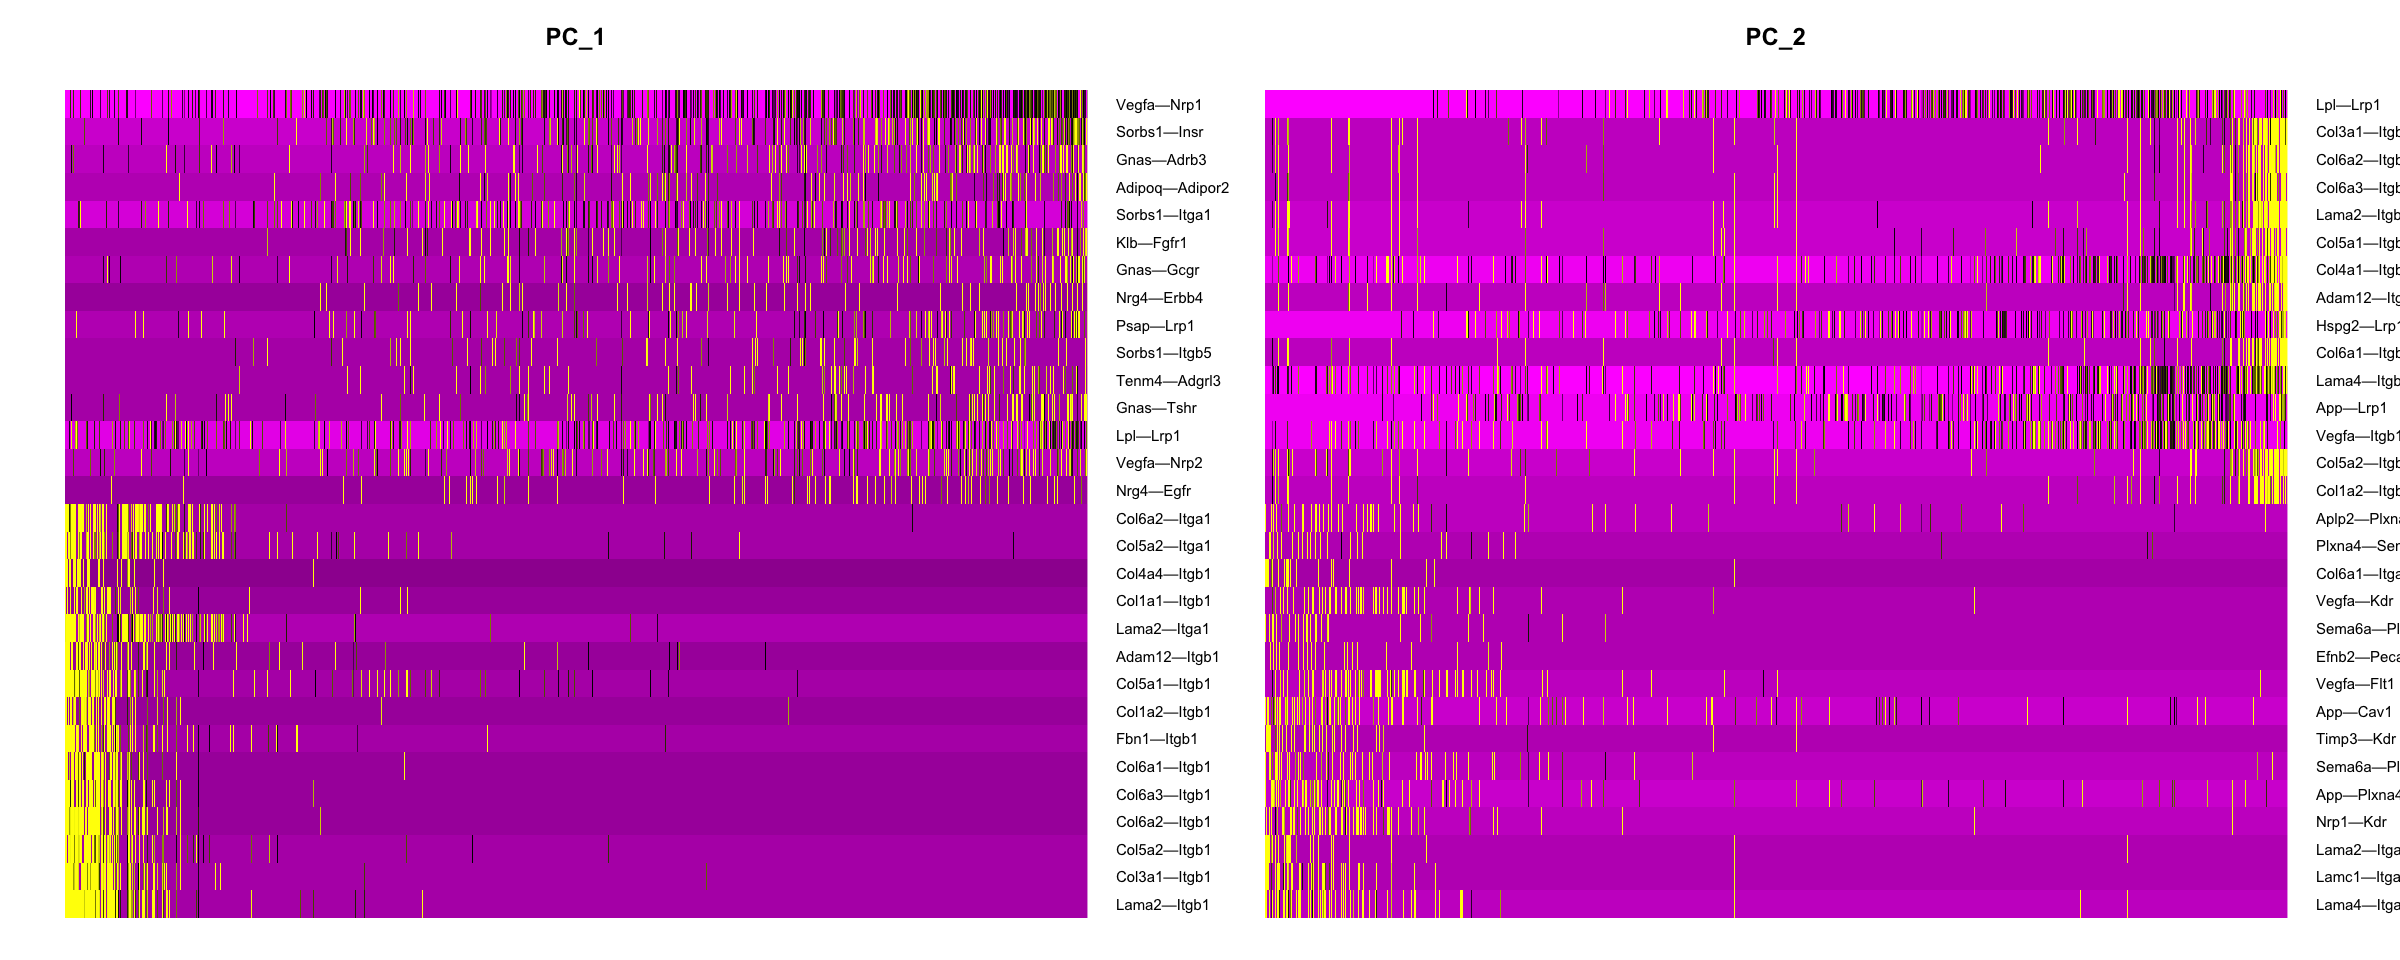

In [11]:
options(repr.plot.width=20, repr.plot.height=8)
PCHeatmap(niches_obj,dims = 1:2,balanced = T) + theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                      #axis.text.y = element_text(size = 20),
                                                      axis.title.x = element_text(size = 20),
                                                      #axis.title.y = element_text(size = 20),
                                                      #plot.title = element_text(hjust = 0.5)
                                                     )

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
niches_obj <- RunUMAP(niches_obj,dims = 1:6)

21:27:07 UMAP embedding parameters a = 0.9922 b = 1.112

21:27:07 Read 8851 rows and found 6 numeric columns

21:27:07 Using Annoy for neighbor search, n_neighbors = 30

21:27:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:27:08 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//RtmpFf9Qet/file157384cec1b32

21:27:08 Searching Annoy index using 1 thread, search_k = 3000

21:27:11 Annoy recall = 99.84%

21:27:11 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:27:11 46 smooth knn distance failures

21:27:12 Initializing from normalized Laplacian + noise (using RSpectra)

21:27:12 Commencing optimization for 500 epochs, with 340742 positive edges

21:27:28 Optimization finished



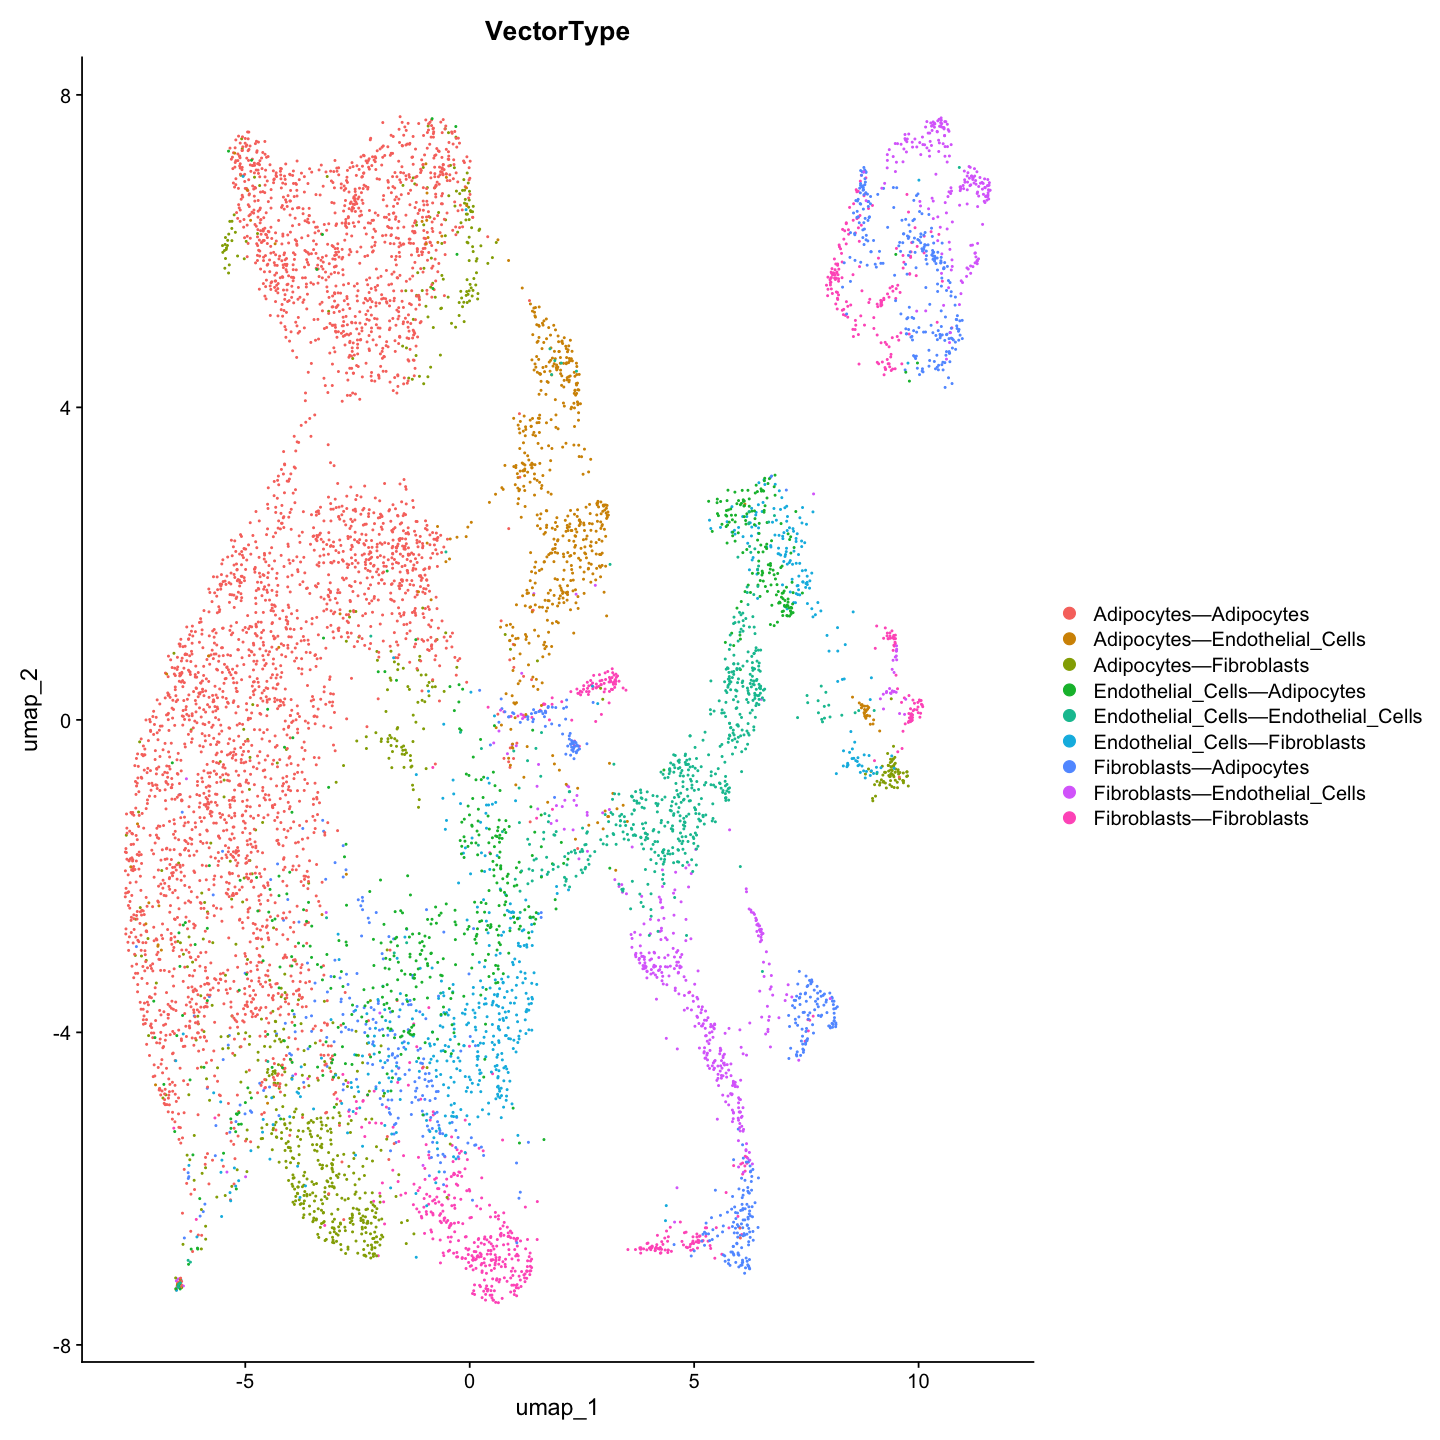

In [13]:
DimPlot(niches_obj,reduction = 'umap',group.by = 'VectorType',label = F)

In [14]:
typeof(sub)

[1] "closure"

Rank k = 25

Identifying non-zero values

Computing Randomized SVD

Find the 0.001000 quantile of each gene

Thresholding by the most negative value of each gene

Scaling all except for 3061 columns

0.00% of the values became negative in the scaling process and were set to zero

The matrix went from 7.01% nonzero to 39.62% nonzero

Setting default assay as alra

Set cell types as Identity of object internally


 4923 distinct cells from 3 celltypes to be analyzed


 Limiting ground truth to genes within dataset


 Mapping against 3302 ground truth signaling mechanisms


 For sampling purposes, please make sure that the active Identity of the input seurat object corresponds to cell types

Normalizing layer: counts


 8851 Cell-To-Cell edges computed, sampling 9 distinct VectorTypes, out of 9 total possible

Centering and scaling data matrix

PC_ 1 
Positive:  Klb—Fgfr1, Adipoq—Adipor2, Gpi—Amfr, Sorbs1—Itga1, Adipoq—Adipor1, Sorbs1—Insr, Col7a1—Itgb1, Psap—Sort1, Cntnap1—Rtn4, Apoe—Sor

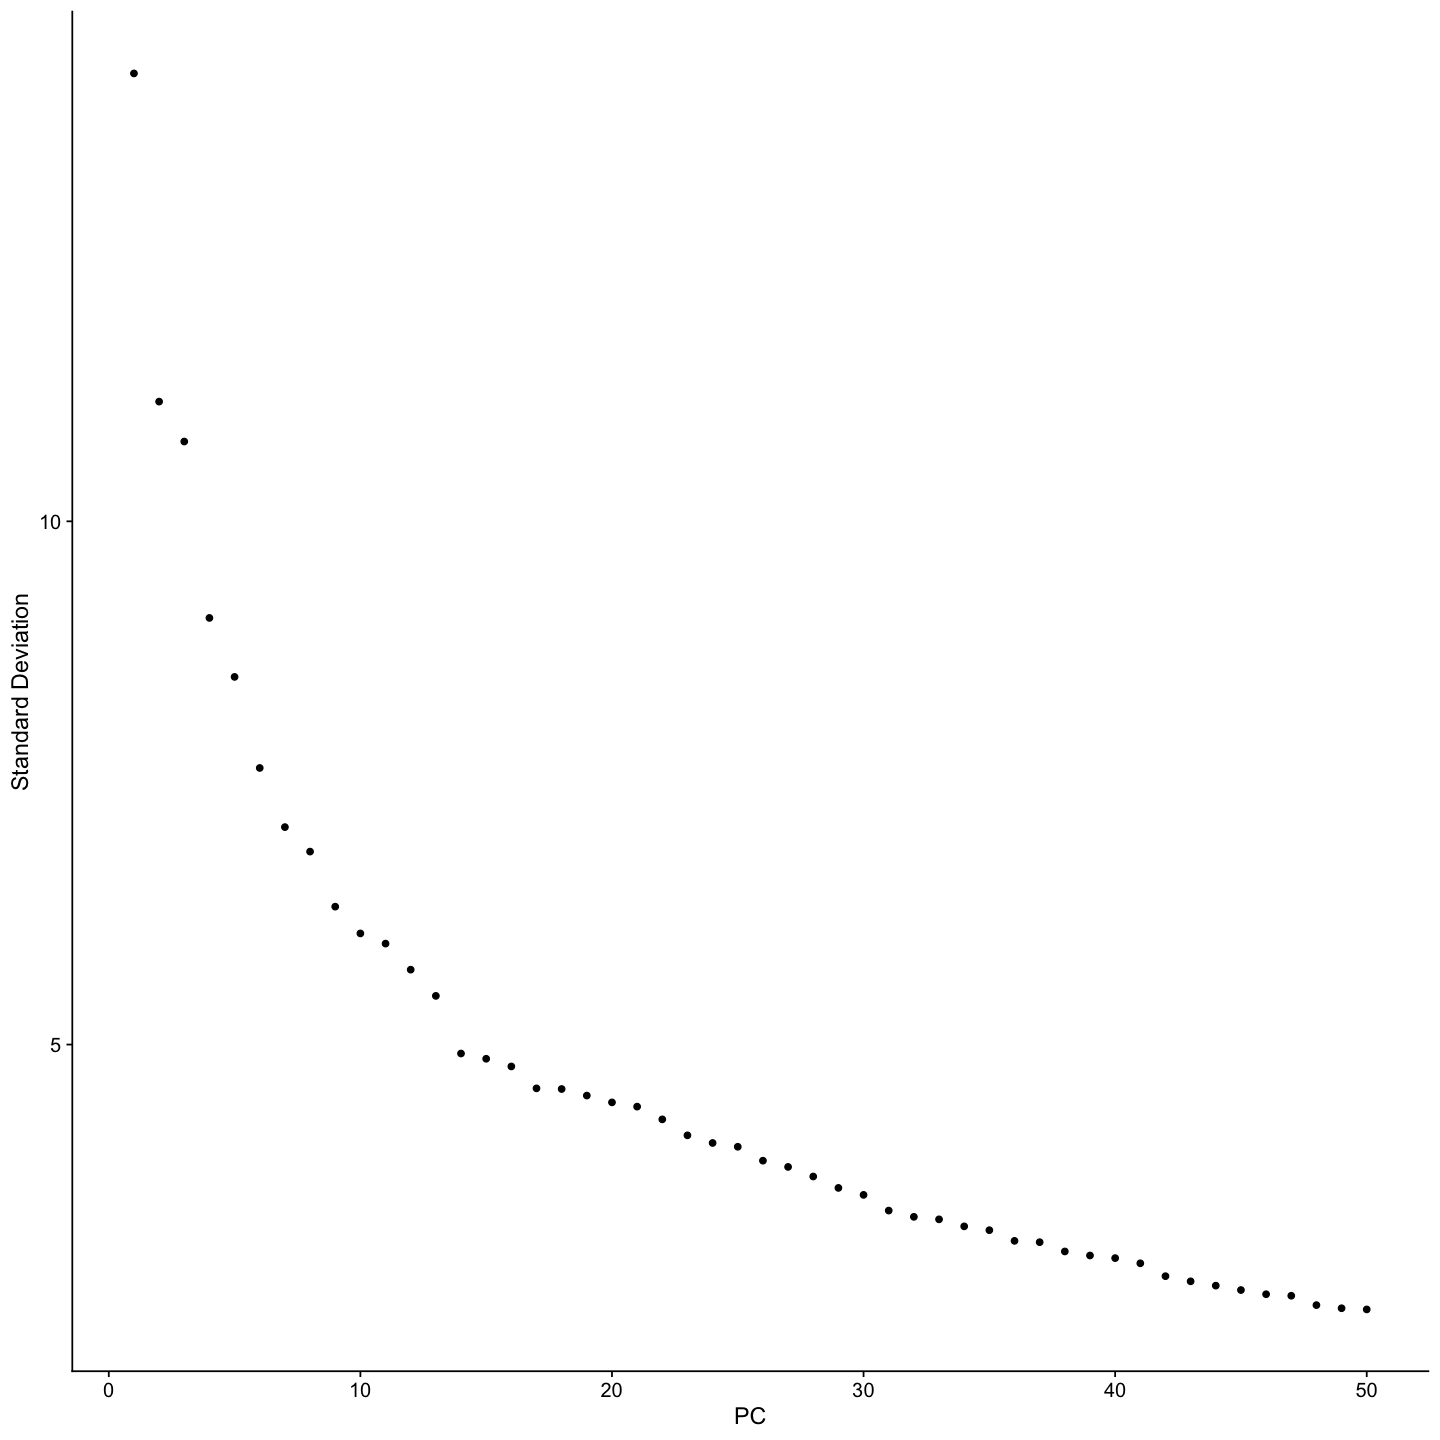

In [15]:
imputed <- SeuratWrappers::RunALRA(adipocytes_sub)
scc.imputed <- RunNICHES(imputed,
                 assay = 'alra',
                 species = 'mouse',
                 LR.database = 'omnipath',
                 cell_types = 'celltype_broad',
                 CellToCell = T)
niches_obj.2 <- scc.imputed$CellToCell
niches_obj.2 <- ScaleData(niches_obj.2)
niches_obj.2 <- RunPCA(niches_obj.2,features = rownames(niches_obj.2))
ElbowPlot(niches_obj.2,ndims=50)

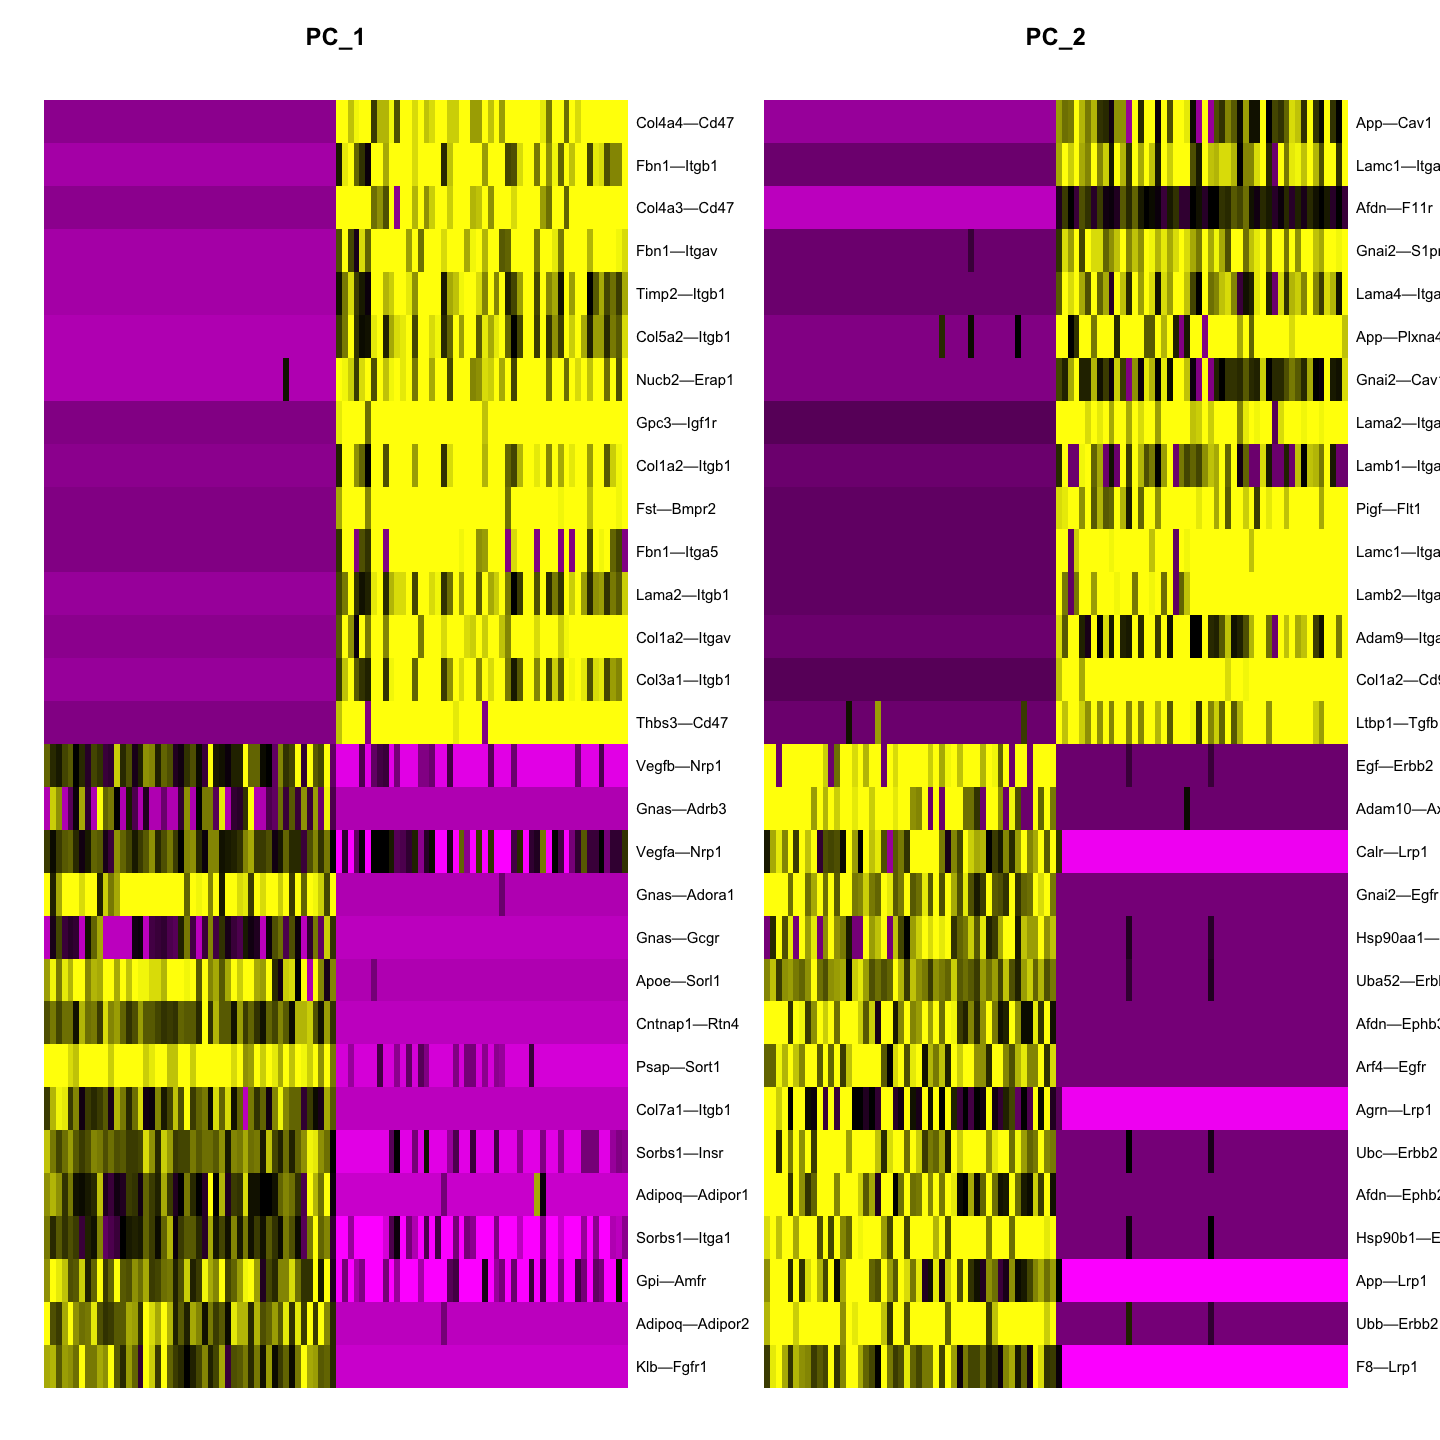

In [16]:
PCHeatmap(`niches_obj.2`,dims = 1:2,balanced = T,cells = 100)

In [17]:
niches_obj.2 <- RunUMAP(niches_obj.2,dims = 1:6)

21:30:30 UMAP embedding parameters a = 0.9922 b = 1.112

21:30:30 Read 8851 rows and found 6 numeric columns

21:30:30 Using Annoy for neighbor search, n_neighbors = 30

21:30:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:30:31 Writing NN index file to temp file /var/folders/kk/5gbzbkc93xb_g56p3bt9t8gh0000gp/T//RtmpFf9Qet/file1573861a497b4

21:30:31 Searching Annoy index using 1 thread, search_k = 3000

21:30:33 Annoy recall = 100%

21:30:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

21:30:35 Found 3 connected components, 
falling back to 'spca' initialization with init_sdev = 1

21:30:35 Using 'irlba' for PCA

21:30:35 PCA: 2 components explained 49.92% variance

21:30:35 Scaling init to sdev = 1

21:30:35 Commenci

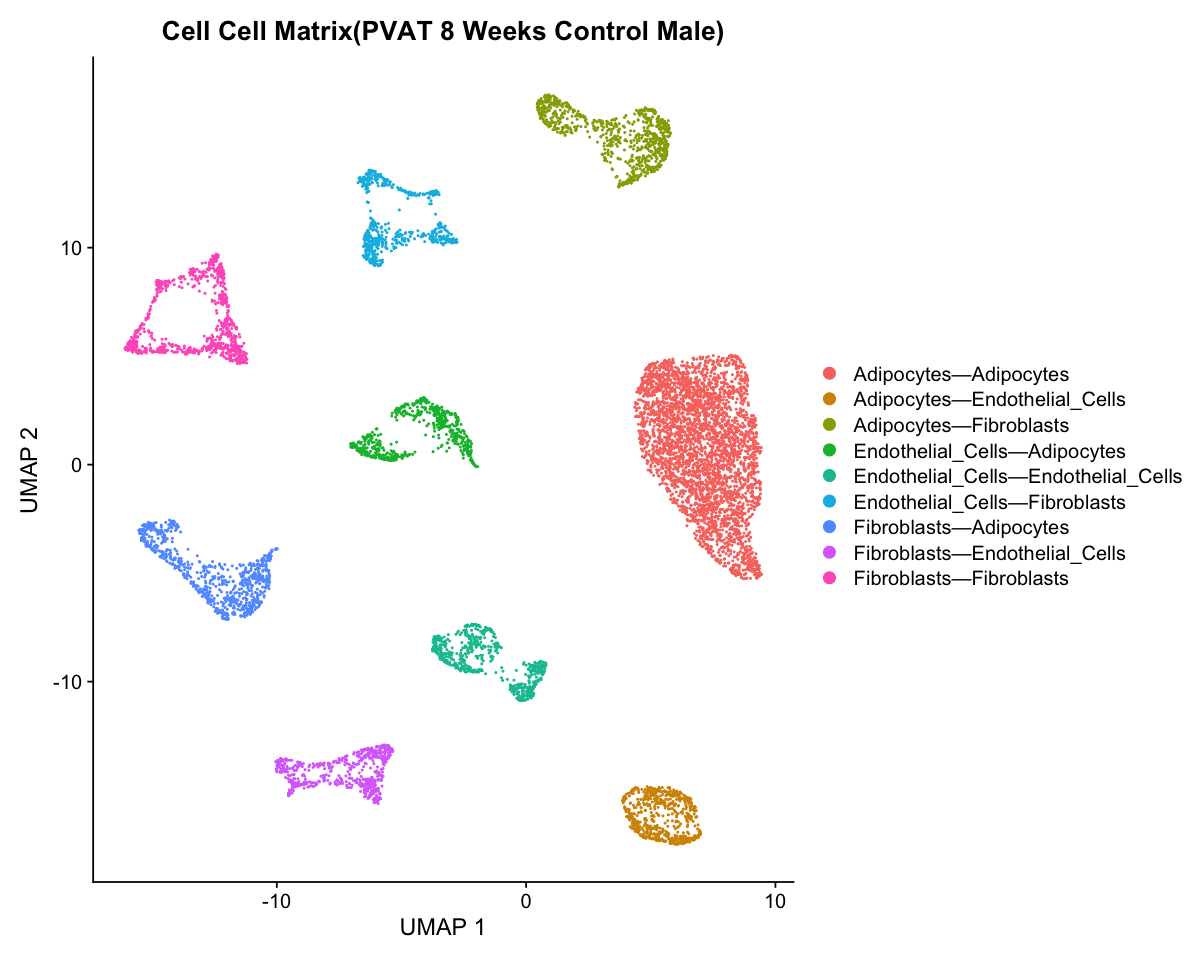

In [27]:
options(repr.plot.width=10, repr.plot.height=8)
plot <- DimPlot(niches_obj.2,reduction = 'umap',group.by = 'VectorType',label = F) + ggtitle("Cell Cell Matrix(PVAT 8 Weeks Control Male)") +
  theme(plot.title = element_text(hjust = 0.5)) + labs(x = "UMAP 1", y = "UMAP 2")
plot
ggsave("Cell Cell Matrix(PVAT 8 Weeks Control Male).pdf", plot = plot, width = 10, height = 8, dpi = 300)

In [19]:
# Find markers
mark <- FindAllMarkers(niches_obj.2,min.pct = 0.25,only.pos = T,test.use = "roc")
GOI_niche <- mark %>% group_by(cluster) %>% top_n(5,myAUC)

Calculating cluster Fibroblasts—Fibroblasts

Calculating cluster Fibroblasts—Adipocytes

Calculating cluster Fibroblasts—Endothelial_Cells

Calculating cluster Adipocytes—Fibroblasts

Calculating cluster Adipocytes—Adipocytes

Calculating cluster Adipocytes—Endothelial_Cells

Calculating cluster Endothelial_Cells—Fibroblasts

Calculating cluster Endothelial_Cells—Adipocytes

Calculating cluster Endothelial_Cells—Endothelial_Cells



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


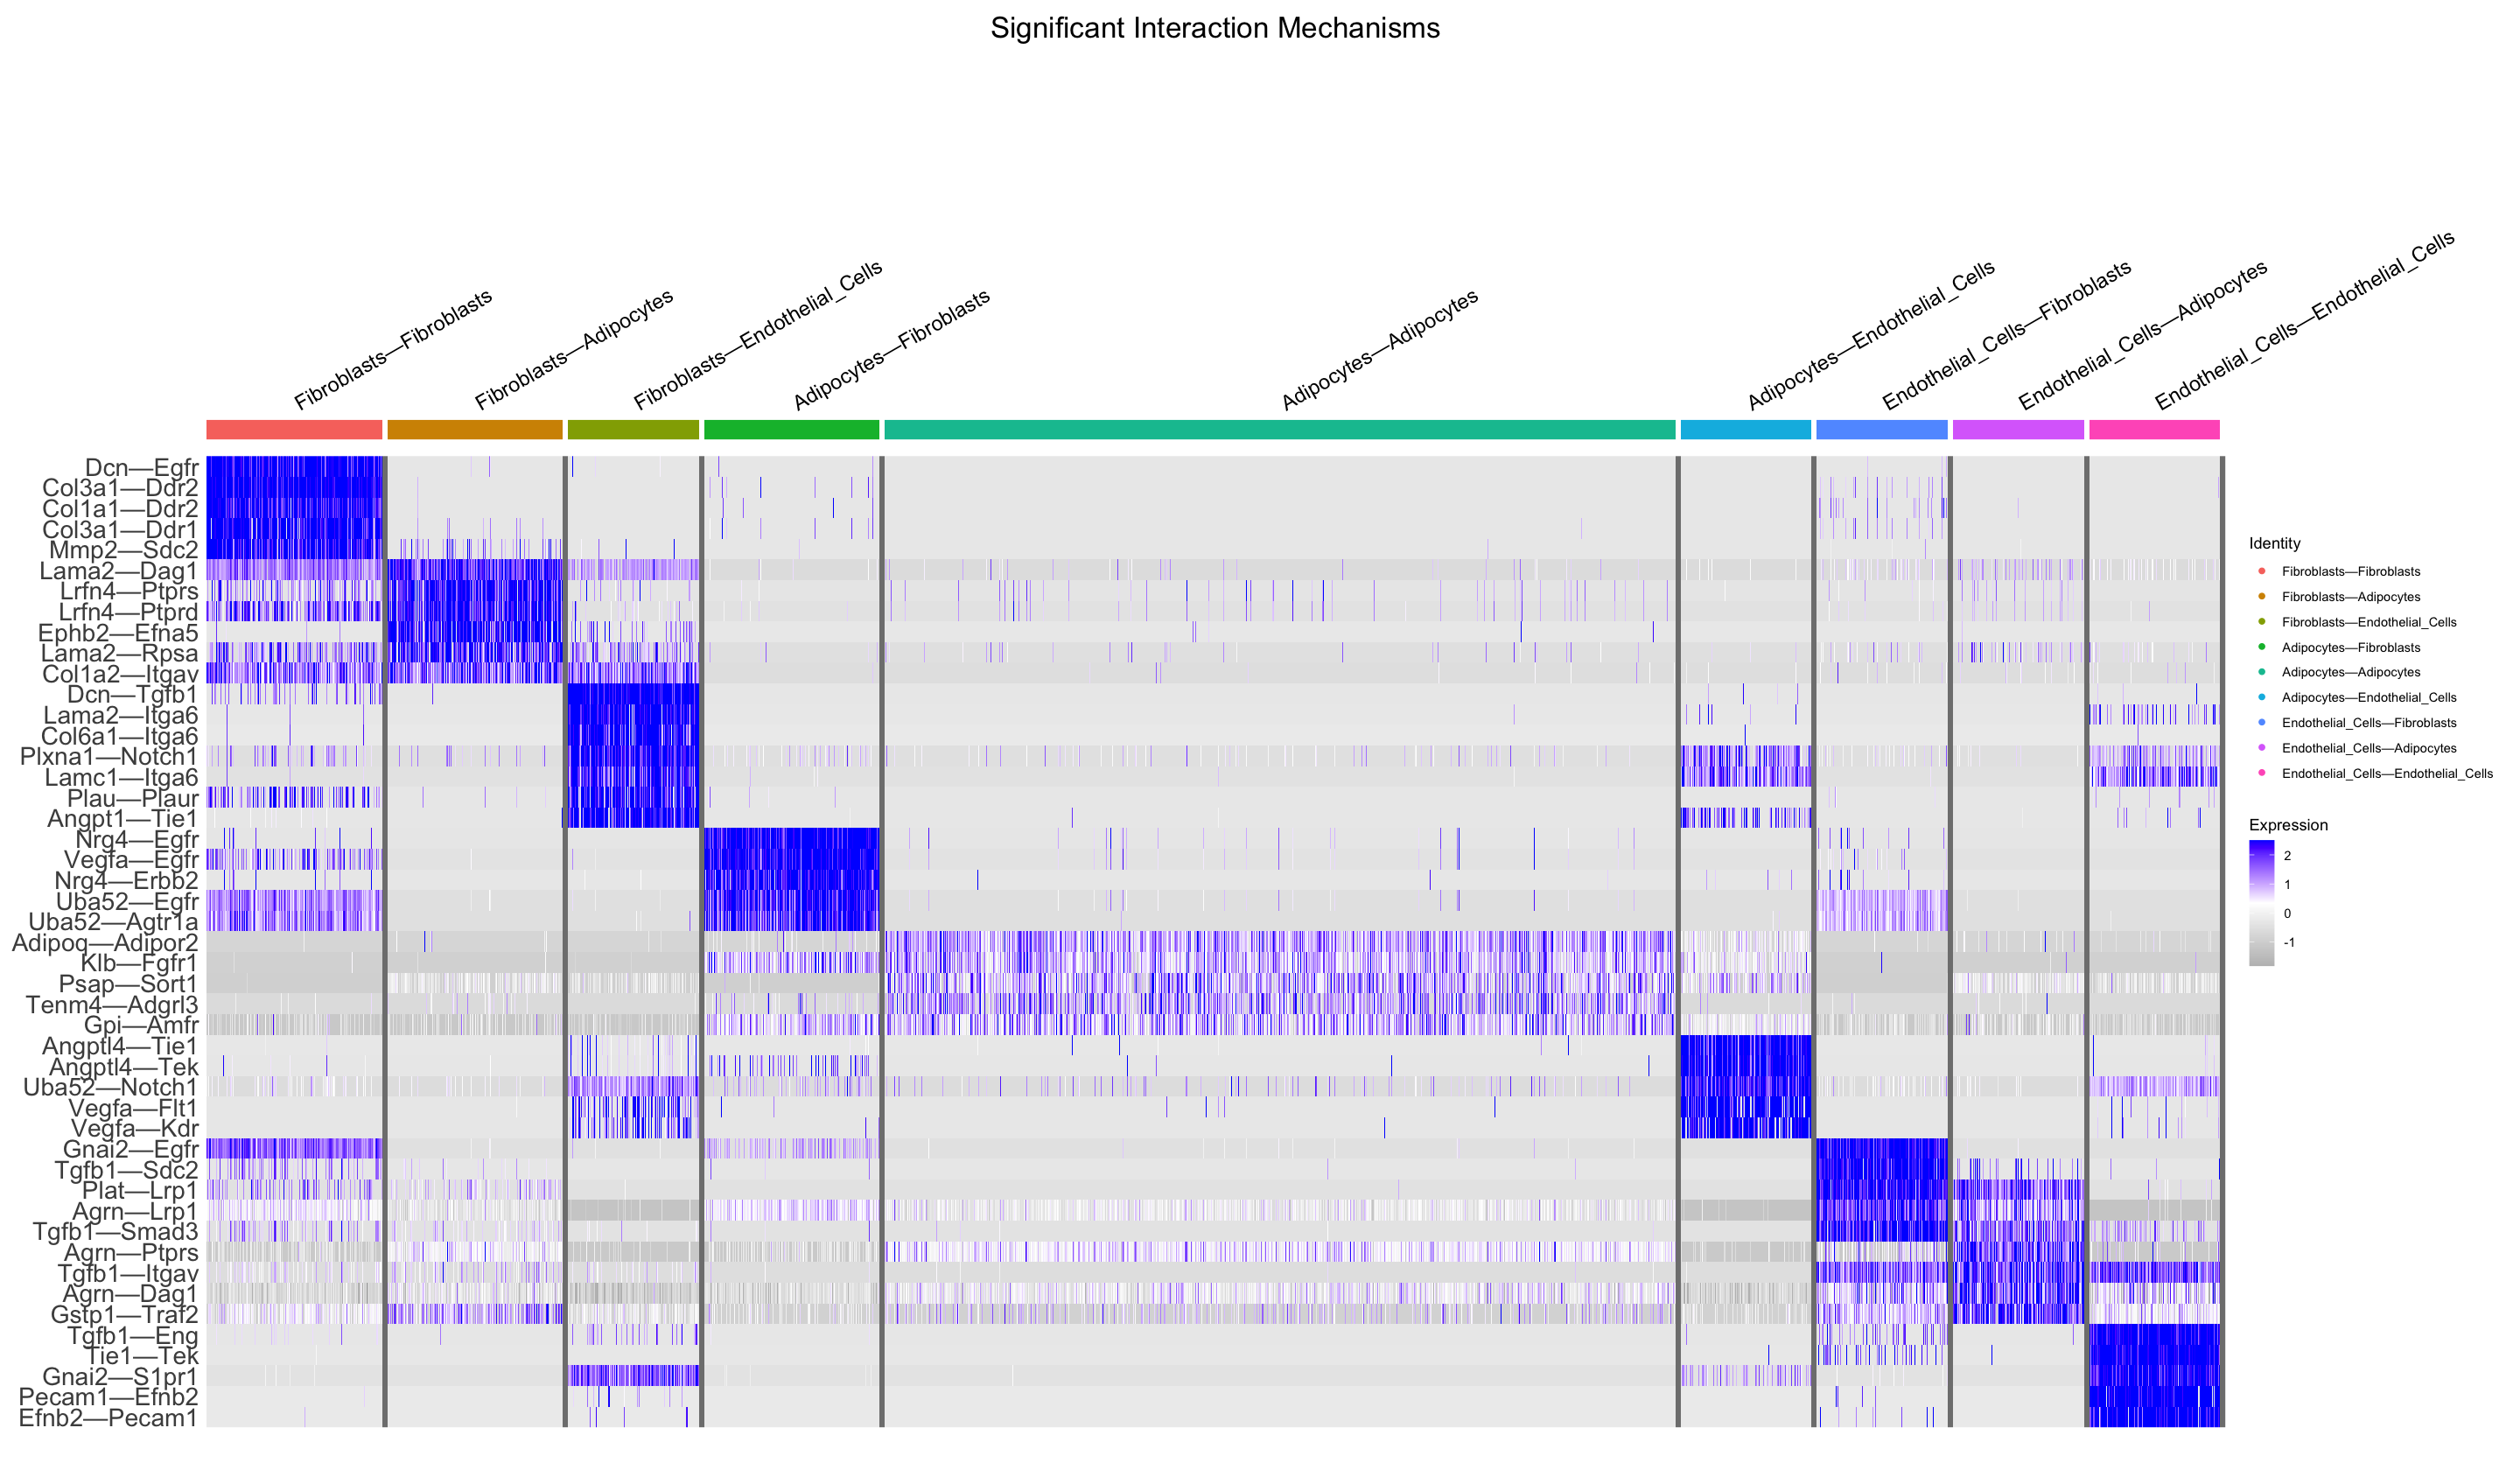

In [30]:
options(repr.plot.width=24, repr.plot.height=14)
plot <- DoHeatmap(niches_obj.2,features = unique(GOI_niche$gene), angle=30, size = 5)+ 
  scale_fill_gradientn(colors = c("grey","white", "blue")) + ggtitle("Significant Interaction Mechanisms")+ theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17),
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   plot.title = element_text(hjust = 0.5, size =20))
plot
ggsave("Significant Interaction Mechanisms.pdf", plot = plot, width = 24, height = 14, dpi = 300)

In [21]:
adi_fibro_sub <- subset(niches_obj.2,idents = "Adipocytes—Endothelial_Cells")
adi_fibro_sub

An object of class Seurat 
3302 features across 588 samples within 1 assay 
Active assay: CellToCell (3302 features, 0 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [22]:
umap_coords <- Embeddings(adi_fibro_sub, reduction = "umap")
kmeans_clusters <- kmeans(umap_coords, centers = 5)
adi_fibro_sub$cluster_subset <- as.factor(kmeans_clusters$cluster)

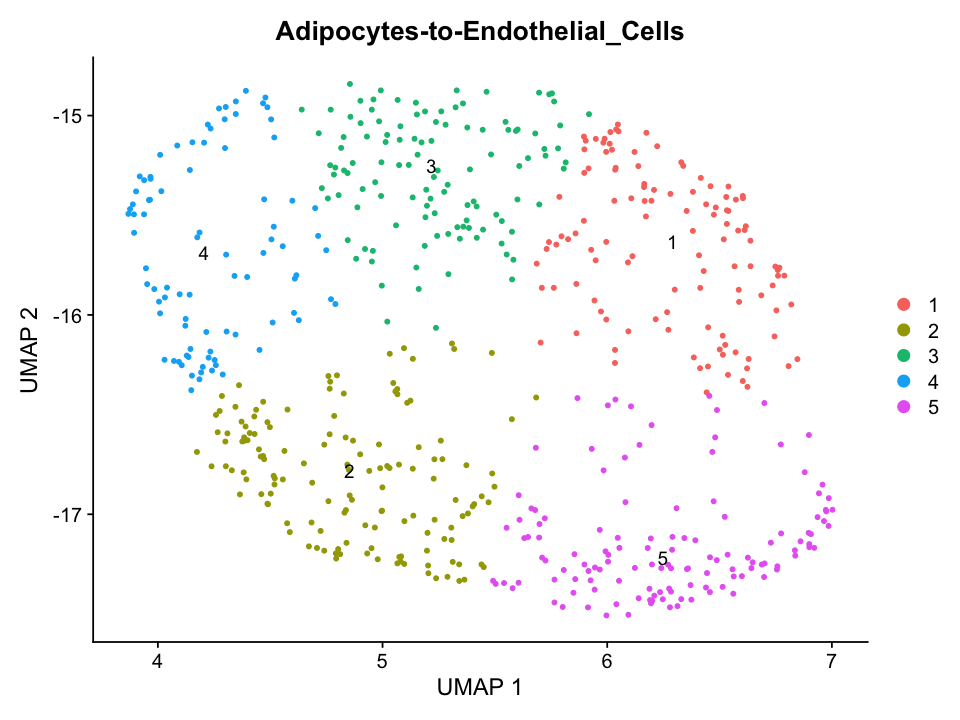

In [31]:
options(repr.plot.width=8, repr.plot.height=6)
plot <- DimPlot(adi_fibro_sub, reduction = "umap", group.by = "cluster_subset", label = TRUE) +
  ggtitle("Adipocytes-to-Endothelial_Cells") +
  theme(plot.title = element_text(hjust = 0.5)) + labs(x = "UMAP 1", y = "UMAP 2")
plot
ggsave("Adipocytes-to-Endothelial_Cells.pdf", plot = plot, width = 8, height = 6, dpi = 300)

In [24]:
Idents(adi_fibro_sub) <- "cluster_subset"

In [25]:
# Find markers
mark.1 <- FindAllMarkers(adi_fibro_sub,min.pct = 0.25,only.pos = T,test.use = "roc")
GOI_niche.1 <- mark.1 %>% group_by(cluster) %>% top_n(5,myAUC)

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [26]:
GOI_niche.1

myAUC,avg_diff,power,avg_log2FC,pct.1,pct.2,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.841,1.2437376,0.682,1.8555752,0.888,0.288,1,Psap—Celsr1
0.814,0.9467299,0.628,1.3659252,0.966,0.436,1,Vegfa—Itga9
0.801,0.5467584,0.602,0.7891327,0.897,0.299,1,Vegfa—Sirpa
0.786,0.4537521,0.572,0.7833904,0.767,0.193,1,Rgl2—Rxfp2
0.782,3.2552983,0.564,4.7624354,0.672,0.144,1,Calm2—Hmmr
0.782,0.8065345,0.564,1.1637707,0.871,0.396,1,Efna5—Ephb1
0.845,1.0050626,0.690,1.4800397,0.972,0.488,2,Pkm—Cd44
0.833,1.0398627,0.666,1.5285782,0.986,0.523,2,Uba52—Fgfr2
0.832,0.9425305,0.664,1.4501600,0.979,0.488,2,Psen1—Cd44


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


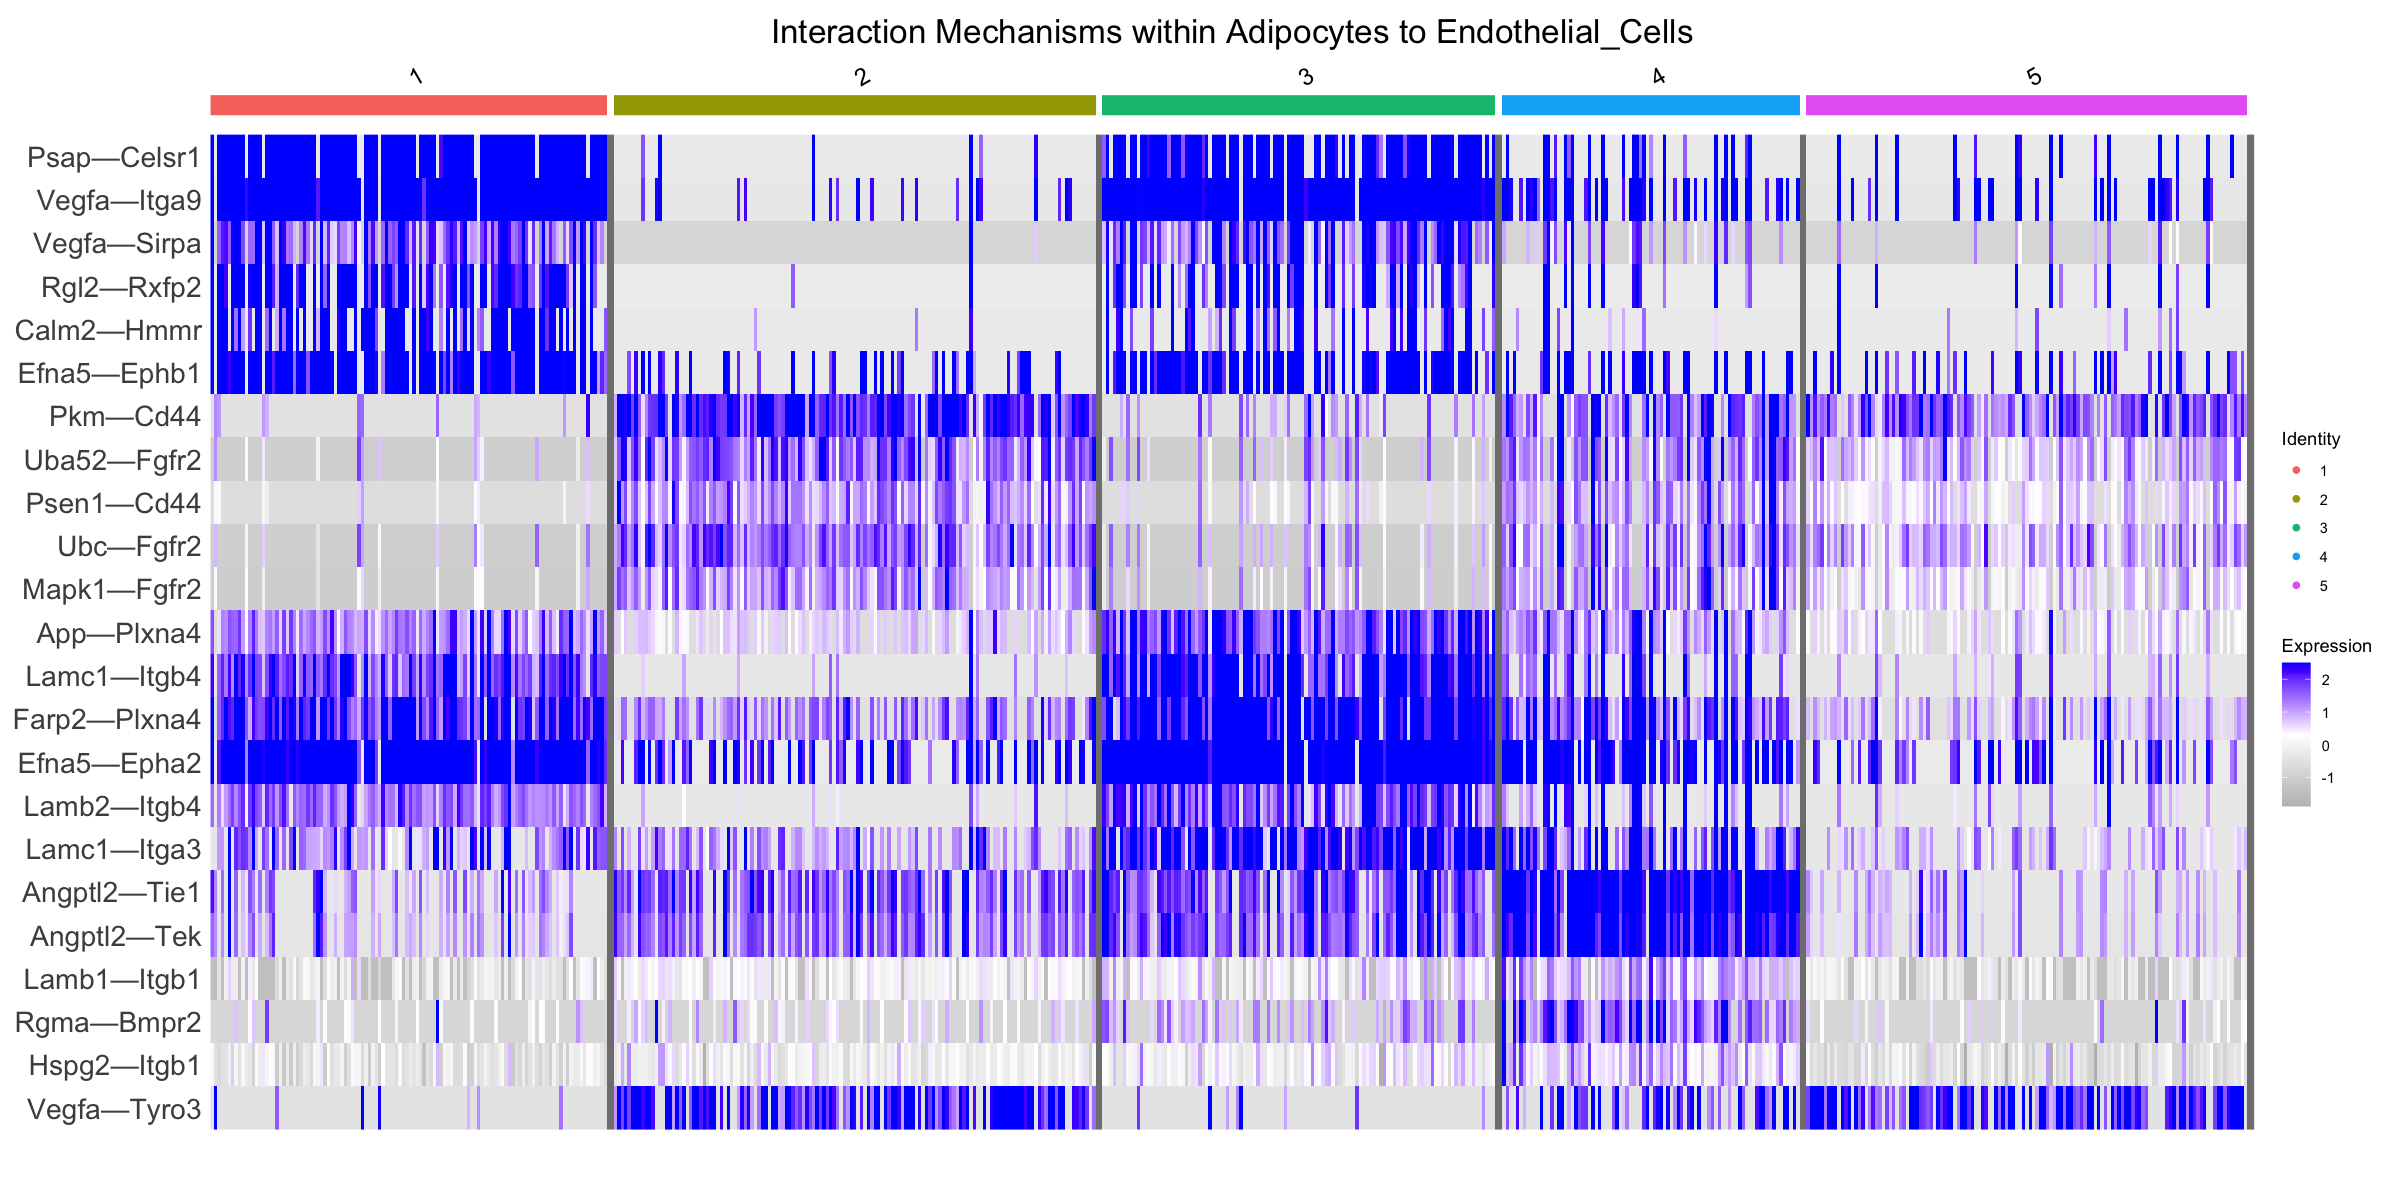

In [32]:
options(repr.plot.width=20, repr.plot.height=10)
plot <- DoHeatmap(adi_fibro_sub,features = unique(GOI_niche.1$gene), angle=30, size = 5)+ 
  scale_fill_gradientn(colors = c("grey","white", "blue")) + ggtitle("Interaction Mechanisms within Adipocytes to Endothelial_Cells")+ theme(#axis.text.x = element_text(face = "italic", size = 20),
                                                                   axis.text.y = element_text(size = 17),
                                                                   #axis.title.x = element_text(size = 20),
                                                                   #axis.title.y = element_text(size = 20),
                                                                   plot.title = element_text(hjust = 0.5, size=20))

plot
ggsave("Interaction Mechanisms within Adipocytes to Endothelial_Cells.pdf", plot = plot, width = 20, height = 10, dpi = 300)